In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Questão 01

In [2]:
data = pd.read_csv('data/dados_lista3.csv', header = None, names = ['X1', 'X2', 'X3'])

In [3]:
data

,X1,X2,X3
0,2.363779,-6.420822,-0.364027
1,1.977516,-2.018005,3.978597
2,2.031534,-4.970056,-2.185831
3,1.604369,-4.398228,-6.081320
4,1.978524,-0.124124,9.031766
...,...,...,...
995,2.528470,-5.003500,-1.173399
996,0.816548,6.082172,17.670526
997,2.644500,-4.004662,-5.146350
998,2.339769,-10.248042,-6.640266


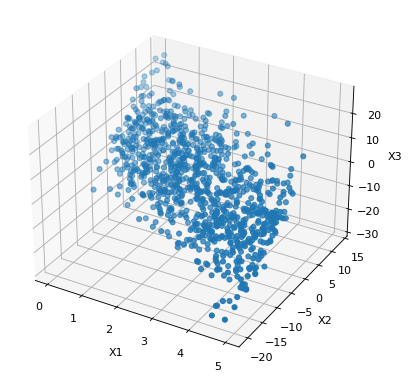

In [5]:
fig = plt.figure()
fig.set_size_inches(8,6)
fig.set_dpi(80)
ax = fig.add_subplot(projection = '3d')
ax.scatter(xs = data['X1'], ys = data['X2'], zs = data['X3'])
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.show()

In [6]:
def normalize(df: pd.DataFrame) -> pd.DataFrame:
    
    df_norm = (df - df.mean())/df.std()
    
    return df_norm

In [7]:
data_norm = normalize(data)

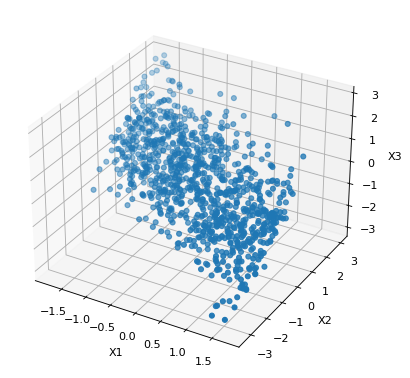

In [9]:
fig = plt.figure()
fig.set_size_inches(8,6)
fig.set_dpi(80)
ax = fig.add_subplot(projection = '3d')
ax.scatter(data_norm['X1'], data_norm['X2'], data_norm['X3'])
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.show()

In [31]:
def pca(X: pd.DataFrame, n_dim: int) -> tuple:

    a, w = np.linalg.eig(X.corr())

    idx_sorted = np.flip(np.argsort(a))

    W = np.zeros([X.shape[1], n_dim])

    for i in range(n_dim):
        W[:, i] = w[:, idx_sorted[i]]

    z = np.dot(W.T, X.T)

    return W, z.T

In [51]:
W1, z1 = pca(data_norm, 1)
W2, z2 = pca(data_norm, 2)

In [52]:
X1_reconstructed = np.dot(W1, z1.T).T + np.array(data.mean())
X2_reconstructed = np.dot(W2, z2.T).T + np.array(data.mean())

In [56]:
X1_reconstructed.shape

(1000, 3)

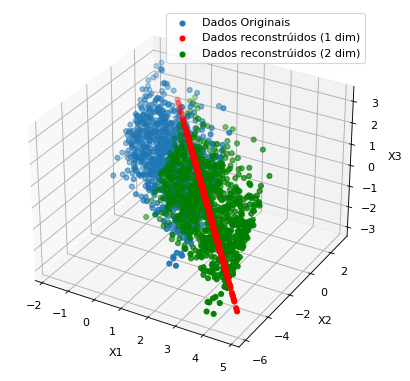

In [87]:
%matplotlib inline

fig = plt.figure()
fig.set_size_inches(8,6)
fig.set_dpi(80)
ax = fig.add_subplot(projection = '3d')
ax.scatter(data_norm['X1'], data_norm['X2'], data_norm['X3'], label = 'Dados Originais')
ax.scatter(X1_reconstructed[:, 0], X1_reconstructed[:, 1], X1_reconstructed[:, 2], color = 'red', label = 'Dados reconstrúidos (1 dim)')
ax.scatter(X2_reconstructed[:, 0], X2_reconstructed[:, 1], X2_reconstructed[:, 2], color = 'green', label = 'Dados reconstrúidos (2 dim)')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

# ax.view_init(90, 0)
plt.legend()
plt.show()

In [90]:
X2_reconstructed.mean(axis = 0)

array([ 2.52389638, -2.81275819,  0.30387943])

In [91]:
X2_reconstructed.std(axis = 0)

array([0.99930019, 0.98664985, 0.98461708])

In [92]:
X1_reconstructed.mean(axis = 0)

array([ 2.52389638, -2.81275819,  0.30387943])

In [93]:
X1_reconstructed.std(axis = 0)

array([0.77215842, 0.93798164, 0.96179051])

Questão 02

In [9]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [5]:
data = load_iris()

In [6]:
X = pd.DataFrame(data['data'], columns = data['feature_names'])

In [11]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [33]:
y = pd.DataFrame(data['target'], columns = ['target'])

In [34]:
mapping = {i : data['target_names'][i] for i in range(y['target'].max() + 1)}

In [16]:
clusters = range(1, 11)
inertia = {}

for k in clusters:
    
    model = KMeans(n_clusters = k, random_state = 0) 
    model.fit(X)
    
    inertia[k] = model.inertia_
    

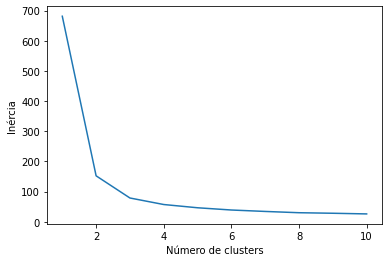

In [17]:
plt.plot(inertia.keys(), inertia.values())
plt.xlabel('Número de clusters')
plt.ylabel('Inércia')
plt.show()